/home/ubuntu/.cache/pypoetry/virtualenvs/cfdmod-7yEqALRC-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


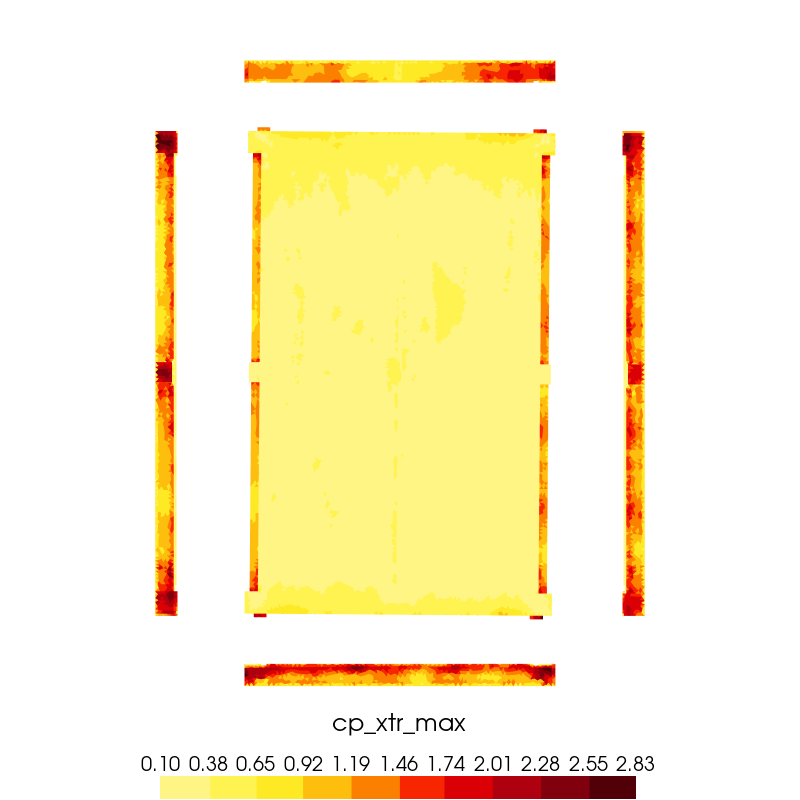

/home/ubuntu/.cache/pypoetry/virtualenvs/cfdmod-7yEqALRC-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


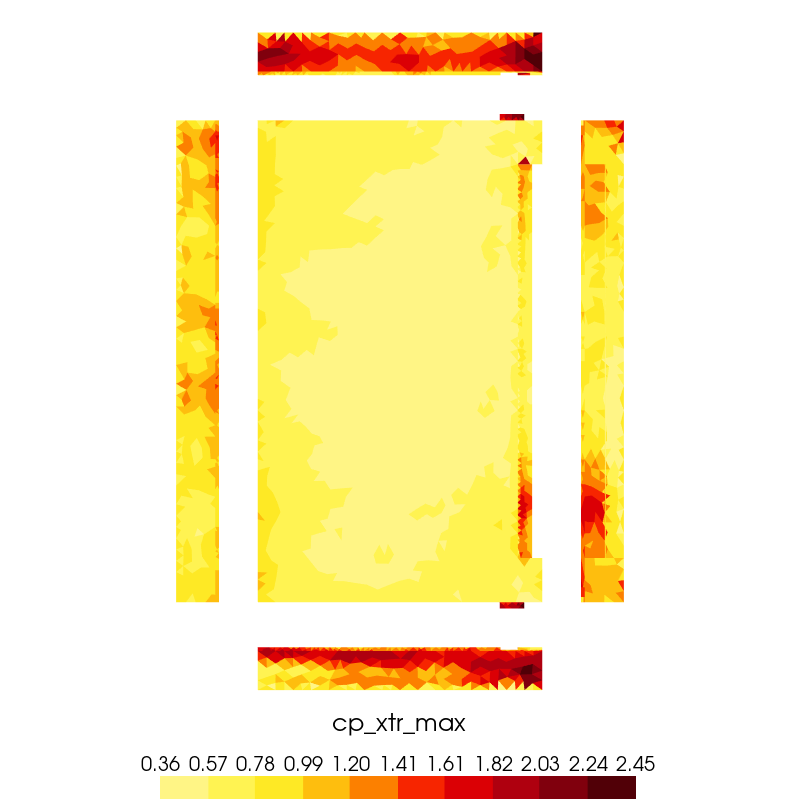

/home/ubuntu/.cache/pypoetry/virtualenvs/cfdmod-7yEqALRC-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


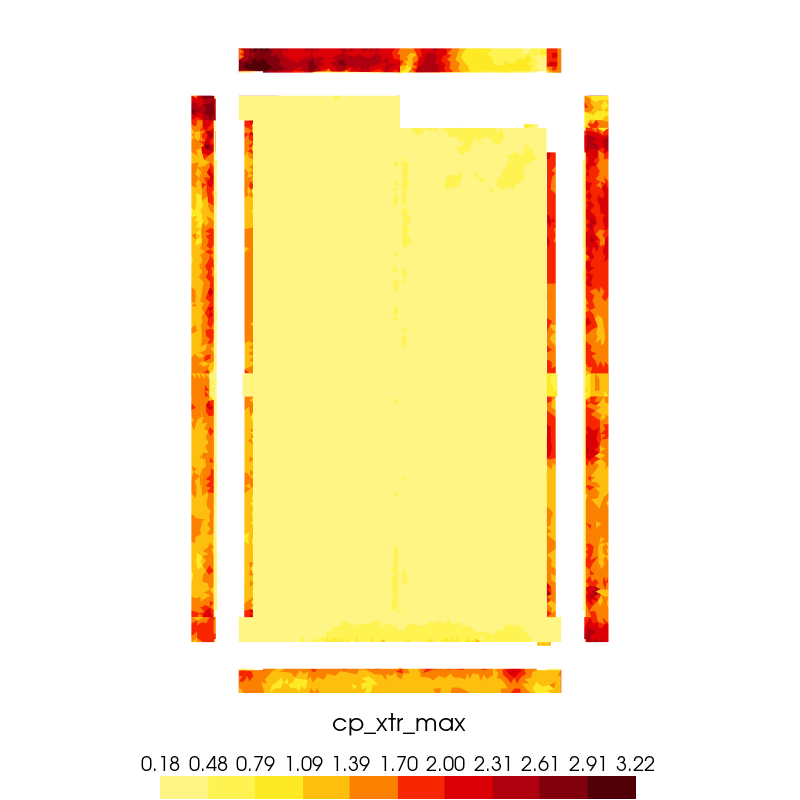

In [4]:
import pathlib

from cfdmod.use_cases.snapshot.camera import take_snapshot
from cfdmod.use_cases.snapshot.config import SnapshotConfig
from cfdmod.use_cases.snapshot.process_image import process_image
from cfdmod.utils import create_folders_for_file

project_path = pathlib.Path("/home/ubuntu/Documentos/Repositories/insight/Docker/local/volume/PrologisCajamar4_final")

for block_lbl in ["G100", "G200", "G300"]:
    cfg_path = project_path / block_lbl / "configs" / "snapshot_params.yaml"
    cfg = SnapshotConfig.from_file(cfg_path)

    output_path = project_path / block_lbl / "images"
    
    vtp_path = project_path / block_lbl / "env_max.vtp"
    for image_cfg in [img for img in cfg.images if img.scalar_label == "cp_xtr_max"]:

    # vtp_path = project_path / block_lbl / "env_min.vtp"
    # for image_cfg in [img for img in cfg.images if img.scalar_label == "cp_xtr_min"]:
    
        create_folders_for_file(output_path / f"{image_cfg.image_label}.png")
        take_snapshot(
            scalar_name=image_cfg.scalar_label,
            file_path=vtp_path,
            output_path=output_path / f"{image_cfg.image_label}.png",
            colormap_params=cfg.colormap,
            projection_params=cfg.projection,
            camera_params=cfg.camera,
        )
        process_image(
            image_path=output_path / f"{image_cfg.image_label}.png",
            output_path=output_path / f"{image_cfg.image_label}.png",
            crop_cfg=cfg.camera.crop,
        )